# **24차시: 딥러닝 모델링 종합**
## **🔍 학습목표**
- 회귀, 이진분류, 다중분류 문제 유형별로 딥러닝 모델 구조와 손실 함수, 평가 지표의 차이를 이해한다.

- 각 문제 유형에 맞는 모델을 직접 구현하고 결과를 비교 분석할 수 있다.
- 각 문제 유형에 맞게 예측 결과를 가공해서 출력할 수 있다.



## **📂 사용 데이터**
- car_fuel_efficiency.csv
- 온라인쇼핑몰_배송완료예측.csv
- customer_grade.csv

## **✨ 핵심 비교**


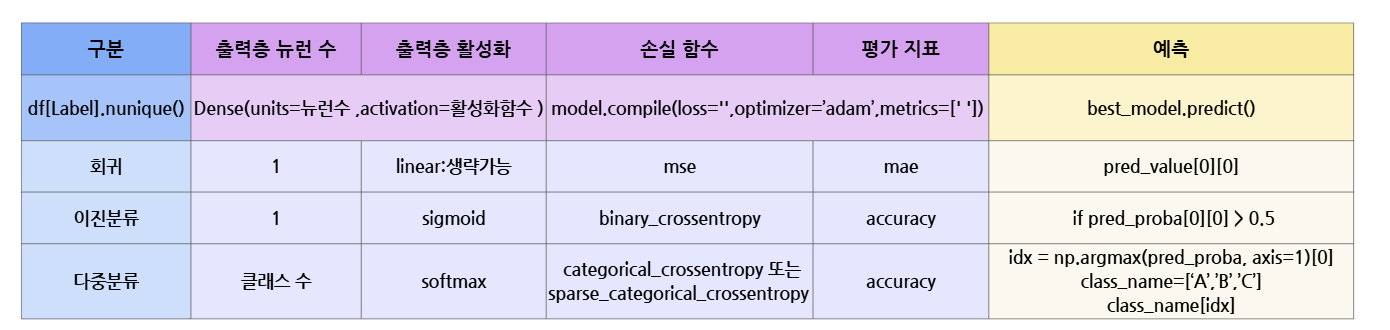

---

## **🎬1. 문제 유형:회귀**


### **국내 자동차 연비 예측**

**[데이터 설명: car_fuel_efficiency.csv]**
- cylinders: 엔진 실린더 수 (예: 4, 6, 8)
- displacement: 엔진 배기량 (단위: cc 또는 L)
- weight: 차량 무게 (단위: kg 또는 lbs)
- accel: 가속력 (0–60mph 도달 시간, 낮을수록 빠름)
- model_year: 차량의 모델 출시 연도
- horsepower: 마력
- origin: 제조 국가 구분 (예: 1=USA, 2=Europe, 3=Japan 등)
- car: 차량 이름 또는 모델명
- **km_per_l: 리터당 주행 거리, 즉 연비 <== 목적 변수**
- maker_type: 제조사 구분 (예: domestic, import_europe, import_japan_us)
- legacy_year: 원본 기준 연도
- year: 실제 차량 연식 (예: 2021)





In [1]:
#기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#딥러닝용 라이브러리
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

# 시드고정
tf.random.set_seed(100)

########데이터 로드

df = pd.read_csv('car_fuel_efficiency.csv')


### **문제1. 주어진 데이터의 종속변수를 확인하여 문제 유형을 판단하고, 아래 중 하나를 답안01 변수에 저장하시오.**

- '회귀'
- '이진분류'
- '다중분류'

In [2]:
# 여기에 코드를 작성하세요.
df['km_per_l'].nunique()

157

In [ ]:
df['km_per_l'].nunique()
답안01='회귀'

In [3]:
##########데이터 분석 및 전처리
df = df.dropna()
df = pd.get_dummies(df,dtype=int)

##########데이터 분리
#피쳐와 레이블 분리
y_data = df['km_per_l'] #타깃
x_data = df.drop(['km_per_l'],axis=1) #피쳐
print(y_data.shape,x_data.shape)


#훈련용과 테스트용 분리
#학습:테스트=7:3
#random_state=777

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

########모델 (model) 구축

model = Sequential()

model.add(Dense(units=16, activation='relu',input_shape=[x_train_scaled.shape[1]]))
model.add(Dropout(0.3)) #과적합방지
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.3)) #과적합방지

model.add(Dense(units=1, activation='linear')) #------->회귀

model.compile(loss='mse',optimizer='adam',metrics=['mae'])#------->회귀

early_stop = EarlyStopping(monitor='val_loss', patience=5)
check_point = ModelCheckpoint('best_model_linear.keras', monitor='val_loss',save_best_only=True)

hist = model.fit(x_train_scaled, y_train, epochs=80, batch_size=32,
                    validation_data=(x_test_scaled, y_test),
                    callbacks=[early_stop,check_point])


(377,) (377, 27)
Epoch 1/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - loss: 156.2156 - mae: 11.3935 - val_loss: 159.6374 - val_mae: 11.5724
Epoch 2/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 153.6625 - mae: 11.2340 - val_loss: 155.5854 - val_mae: 11.4079
Epoch 3/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 146.9498 - mae: 10.9795 - val_loss: 151.8303 - val_mae: 11.2506
Epoch 4/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 144.2512 - mae: 10.8749 - val_loss: 148.2676 - val_mae: 11.0977
Epoch 5/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 137.2812 - mae: 10.6063 - val_loss: 144.7271 - val_mae: 10.9470
Epoch 6/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 136.5375 - mae: 10.5464 - val_loss: 141.1645 - val_mae: 10.7952
Epoch 7/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 132.9505 - mae: 10.3354 - val_loss: 137.6239 - val_mae: 10.6423
Epoch 8/80
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 131.2041 - mae: 10.2206 - val_loss: 134.0553 - val_mae: 10.4851
Epoch 9/80
9/9 

In [4]:
model.evaluate(x_test_scaled,y_test) #val_loss,val_mae

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8.8017 - mae: 2.2074


[9.64873218536377, 2.218355417251587]

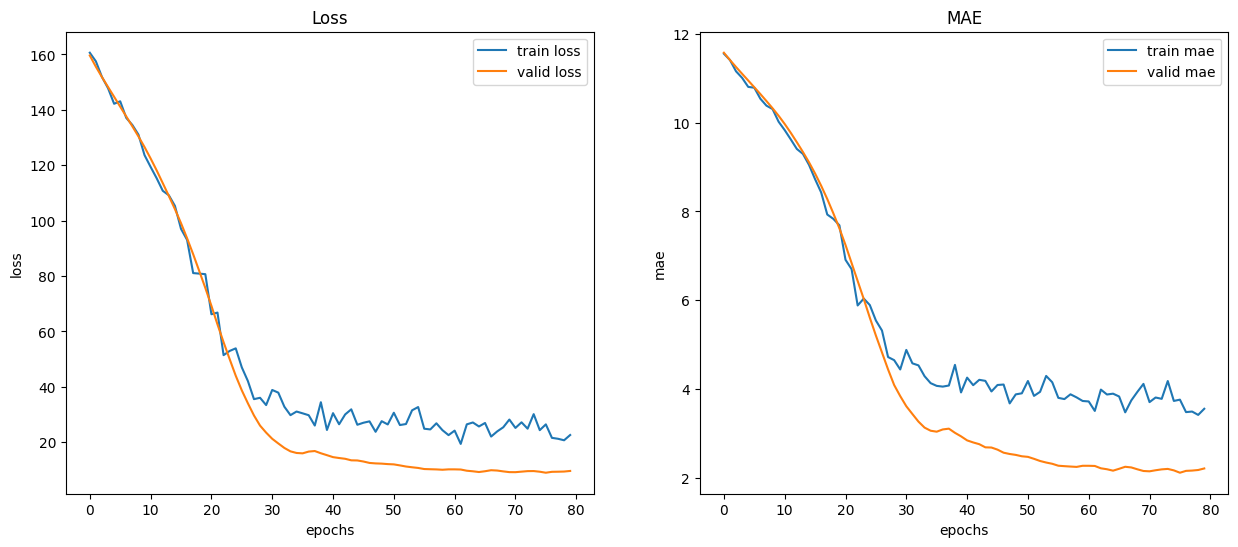

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='valid loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['mae'],label='train mae')
plt.plot(hist.history['val_mae'],label='valid mae')
plt.title('MAE')
plt.xlabel('epochs')
plt.ylabel('mae')
plt.legend()

plt.show()

In [6]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.losses import MeanSquaredError

real_data = [[-0.8, 1.13, 0.18, -0.05, 1.27, 0.76, 1.27, 1.15, 0.57, 0.0, -0.17, -0.12, -0.06, 2.26, -0.45, -0.42, -0.44, -0.12, -0.09, -0.37, -0.06, -0.42, -0.11, 0.0, -0.64, -0.82, 1.5]]

# 모델 로드
best_model = load_model('best_model_linear.keras')

# 예측
pred_value = best_model.predict(np.array(real_data))
print("리터당 킬로수 예측:", pred_value[0][0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
리터당 킬로수 예측: 9.581522


---

## **🎬2. 문제 유형: 이진분류**


### **배송 완료 예측 모델**

**[데이터 설명: 온라인쇼핑몰_주문데이터.csv]**

- 고객ID: 주문 고객을 식별하는 ID
- 주문번호: 주문 단위를 구분하는 번호
- 주문일자: 주문이 접수된 날짜
- 결제금액: 해당 주문의 결제 총액
- 상품종류수: 주문에 포함된 상품 종류 개수
- 고객등급: 고객의 등급 (예: 일반, 우수, VIP)
- 재구매여부: 과거에 해당 고객이 재구매한 이력 (0/1)
- 배송방식: 택배/퀵배송 등
- 배송지역: 지역 정보
- 배송완료여부: 배송이 실제로 완료되었는지 여부 (**예측 목표 label**)



In [8]:
#기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#딥러닝용 라이브러리
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

# 시드고정
tf.random.set_seed(100)

########데이터 로드

df = pd.read_csv('온라인쇼핑몰_배송완료예측.csv')

### **문제2. 주어진 데이터의 종속변수를 확인하여 문제 유형을 판단하고, 아래 중 하나를 답안02 변수에 저장하시오.**

- '회귀'
- '이진분류'
- '다중분류'

In [9]:
# 여기에 코드를 작성하세요.
df['배송완료여부'].nunique()

2

In [ ]:
df['배송완료여부'].nunique()

답안02='이진분류'

In [10]:
##########데이터 분석 및 전처리
df = df.drop(['주문ID','주문번호','고객명','배송지코드'],axis=1)
df = df.dropna()
df = pd.get_dummies(df,dtype=int)

##########데이터 분리
#피쳐와 레이블 분리
y_data = df['배송완료여부'] #타깃
x_data = df.drop(['배송완료여부'],axis=1) #피쳐
print(y_data.shape,x_data.shape)


#훈련용과 테스트용 분리
#학습:테스트=7:3
#random_state=777
#stratify=y_encoded 레이블 균형적으로 분할되도록

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=777,stratify=y_data)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


########모델 (model) 구축

model = Sequential()

model.add(Dense(units=16, activation='relu',input_shape=[x_train_scaled.shape[1]]))
model.add(Dropout(0.3)) #과적합방지
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.3)) #과적합방지

model.add(Dense(units=1,activation='sigmoid')) #------->이진 분류

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])#------------>이진분류

early_stop = EarlyStopping(monitor='val_loss', patience=5)
check_point = ModelCheckpoint('best_model_binary.keras', monitor='val_loss',save_best_only=True)

hist = model.fit(x_train_scaled, y_train, epochs=50, batch_size=32,
                    validation_data=(x_test_scaled, y_test),
                    callbacks=[early_stop,check_point])


(712,) (712, 10)
Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - accuracy: 0.4707 - loss: 0.7457 - val_accuracy: 0.5093 - val_loss: 0.7040
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5248 - loss: 0.7276 - val_accuracy: 0.6028 - val_loss: 0.6773
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5806 - loss: 0.7055 - val_accuracy: 0.6495 - val_loss: 0.6556
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5984 - loss: 0.7014 - val_accuracy: 0.7290 - val_loss: 0.6348
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6656 - loss: 0.6616 - val_accuracy: 0.7523 - val_loss: 0.6134
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6507 - loss: 0.6644 - val_accuracy: 0.7523 - val_loss: 0.5918
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7181 - loss: 0.6092 - val_accuracy: 0.7570 - val_loss: 0.5702
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6749 - loss: 0.6265 - val_acc

In [11]:
model.evaluate(x_test_scaled,y_test)# val_loss, val_accuracy

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8293 - loss: 0.3961 


[0.41476970911026, 0.8130841255187988]

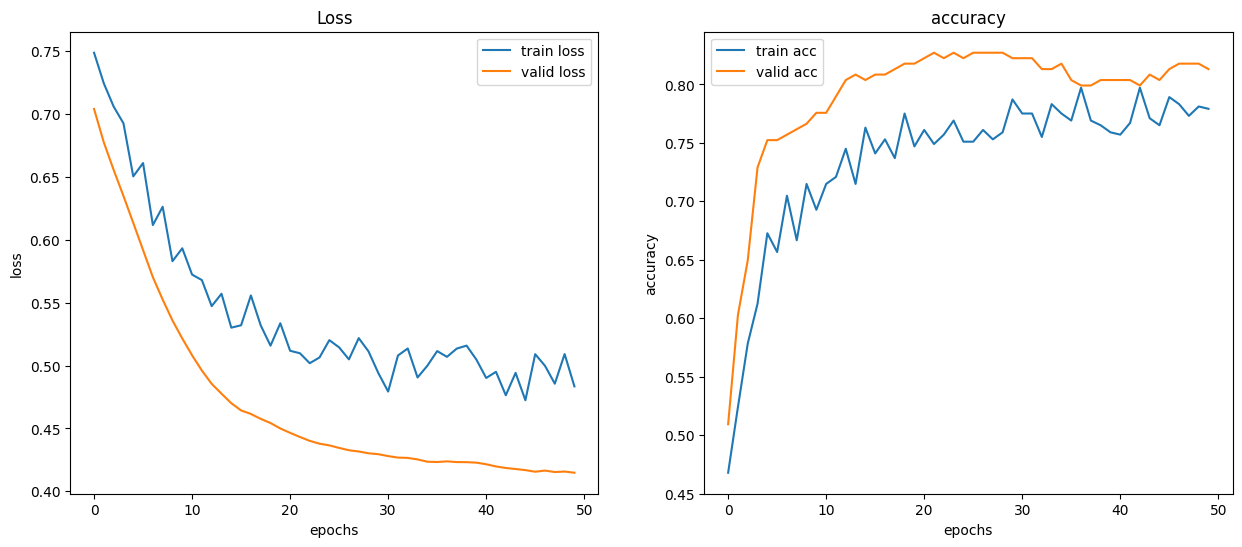

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='valid loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'],label='train acc')
plt.plot(hist.history['val_accuracy'],label='valid acc')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [13]:
# 정답 코드
from tensorflow.keras.models import load_model
import numpy as np

# 고객등급 2, 여성, 30세, 동시주문 2개, 쿠폰 1회, 결제금액 35000원, 주문채널 모바일
real_data = [[-0.31, 0.02, 1.61, 0.62, 0.0, -1.3, 1.3, 2.07, -1.8, -0.22]]

best_model = load_model('best_model_binary.keras')
pred_proba = best_model.predict(np.array(real_data))


if pred_proba[0][0] > 0.5:
    result = "배송 완료"
else:
    result = "미완료 (처리중)"


print(f"모델이 예측한 '배송 완료' 확률: {pred_proba[0][0]:.2%}")
print(f"최종 예측 결과 (기준 0.5): {result}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
모델이 예측한 '배송 완료' 확률: 82.19%
최종 예측 결과 (기준 0.5): 배송 완료


## **🎬3. 문제 유형: 다중분류:Sparse Categorical**


### **고객 등급 예측 모델**

**[데이터 설명: customer_grade.csv]**

- product_type: 고객이 주로 구매하는 상품 유형 (예: Books, Furniture, Beauty 등)
- branch_region: 고객이 방문하거나 주문한 지점 지역 (Seoul, Busan, Daegu)
- purchase_amt: 1회 평균 구매 금액 (원화)
- purchase_freq: 일정 기간(예: 월간) 동안의 구매 횟수
- visit_interval: 평균 방문 주기 (일 단위)
- total_spent: 누적 총 구매 금액 (원화)
- gender: 고객 성별 (MALE, FEMALE)
- **grade: 고객 등급 (Basic, Premium, VIP) <==목표변수**
- gender_code: 성별을 수치형으로 변환한 값 (MALE=1, FEMALE=0)
- cust_id: 고객 고유 식별 번호
- loyalty_index: 고객 충성도를 수치로 나타낸 지표 (높을수록 충성도 높음)


In [14]:
#기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#딥러닝용 라이브러리
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

# 시드고정
tf.random.set_seed(100)

########데이터 로드

df = pd.read_csv('customer_grade.csv')

### **문제3. 주어진 데이터의 종속변수를 확인하여 문제 유형을 판단하고, 아래 중 하나를 답안03 변수에 저장하시오.**

- '회귀'
- '이진분류'
- '다중분류'

In [15]:
# 여기에 코드를 작성하세요.
df['grade'].nunique()

3

In [ ]:
df['grade'].nunique()

답안03='다중분류'

In [16]:
##########데이터 분석 및 전처리
df = df.dropna()
obj_cols = ['product_type','branch_region',	'gender']
df = pd.get_dummies(df,columns=obj_cols, drop_first=False,dtype=int)


##########데이터 분리
#피쳐와 레이블 분리
y_data = df['grade'] #타깃
x_data = df.drop(['grade'],axis=1) #피쳐
print(y_data.shape,x_data.shape)

########## 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_data) #'Basic','Premium','VIP' -> 0,1,2로 변환

#훈련용과 테스트용 분리
#학습:테스트=7:3
#random_state=777
#stratify=y_encoded 레이블 균형적으로 분할되도록

x_train, x_test, y_train, y_test = train_test_split(x_data, y_encoded, test_size=0.3, random_state=777,stratify=y_encoded)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

########모델 (model) 구축

model = Sequential()

model.add(Dense(units=16, activation='relu',input_shape=[x_train_scaled.shape[1]]))
model.add(Dropout(0.3)) #과적합방지
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.3)) #과적합방지

model.add(Dense(units=3,activation='softmax')) #------->다중 분류

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc'])#------------>다중 분류:라벨 인코딩

early_stop = EarlyStopping(monitor='val_loss', patience=5)
check_point = ModelCheckpoint('best_model_sparse_cate.keras', monitor='val_loss',save_best_only=True)

hist = model.fit(x_train_scaled, y_train, epochs=50, batch_size=32,
                    validation_data=(x_test_scaled, y_test),
                    callbacks=[early_stop,check_point])


(273,) (273, 19)
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 71ms/step - acc: 0.3547 - loss: 1.2414 - val_acc: 0.3659 - val_loss: 1.1654
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.3293 - loss: 1.2067 - val_acc: 0.3415 - val_loss: 1.1472
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - acc: 0.3492 - loss: 1.1468 - val_acc: 0.3171 - val_loss: 1.1311
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.3427 - loss: 1.1366 - val_acc: 0.3293 - val_loss: 1.1160
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - acc: 0.3434 - loss: 1.1339 - val_acc: 0.3171 - val_loss: 1.1038
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.4089 - loss: 1.1569 - val_acc: 0.3049 - val_loss: 1.0931
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - acc: 0.3957 - loss: 1.0999 - val_acc: 0.3049 - val_loss: 1.0851
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - acc: 0.4203 - loss: 1.1178 - val_acc: 0.3171 - val_loss: 1.0789
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.3773 

In [17]:
model.evaluate(x_test_scaled,y_test)#val_loss,val_acc

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.3987 - loss: 1.0704


[1.0549023151397705, 0.4146341383457184]

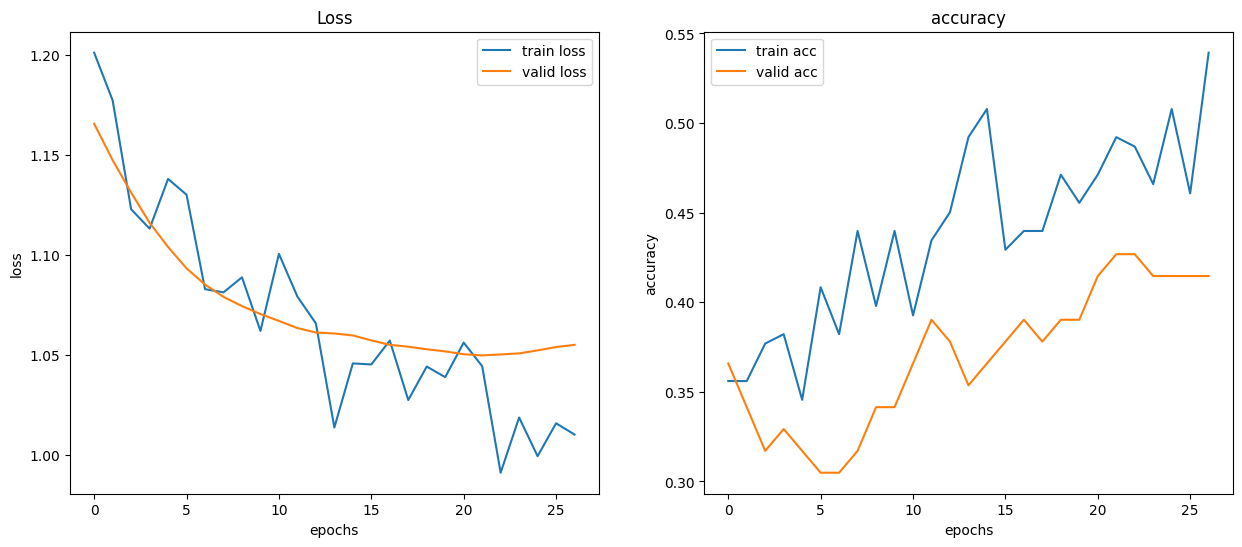

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='valid loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['acc'],label='train acc')
plt.plot(hist.history['val_acc'],label='valid acc')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [19]:
# 정답 코드
from tensorflow.keras.models import load_model
import numpy as np

# 35세 남성, 1년 간 150만원 지출, 최근 3개월 내 12회 방문, VIP 추천인, 서울 강남 지점, 의류 구매
real_data = [[-8.13, -8.61, -11.41, -4.58, -1.03, -1.77, 0.04, -0.41, -0.35, 2.58, -0.39, -0.45, -0.44, -0.42, -0.99, -0.75, -0.41, -0.97, -1.03]]

best_model = load_model('best_model_sparse_cate.keras')
pred_proba = best_model.predict(np.array(real_data))
pred_class_idx = np.argmax(pred_proba, axis=1)[0]

# LabelEncoder의 클래스 순서를 직접 리스트로 정의
# le.classes_ 로 확인했던 순서 ['Basic', 'Premium', 'VIP']
class_names = ['Basic', 'Premium', 'VIP']

#인덱스를 사용하여 최종 등급 이름으로 변환
predicted_grade = class_names[pred_class_idx]


print(f"모델이 예측한 각 등급일 확률 (Basic, Premium, VIP 순): {np.round(pred_proba, 2)}")
print(f"최종 예측 등급: {predicted_grade}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
모델이 예측한 각 등급일 확률 (Basic, Premium, VIP 순): [[0.49 0.35 0.16]]
최종 예측 등급: Basic


## **🎬4. 문제 유형: 다중분류:Categorical**


### **고객 등급 예측 모델**

**[데이터 설명: customer_grade.csv]**

- product_type: 고객이 주로 구매하는 상품 유형 (예: Books, Furniture, Beauty 등)
- branch_region: 고객이 방문하거나 주문한 지점 지역 (Seoul, Busan, Daegu)
- purchase_amt: 1회 평균 구매 금액 (원화)
- purchase_freq: 일정 기간(예: 월간) 동안의 구매 횟수
- visit_interval: 평균 방문 주기 (일 단위)
- total_spent: 누적 총 구매 금액 (원화)
- gender: 고객 성별 (MALE, FEMALE)
- **grade: 고객 등급 (Basic, Premium, VIP) <==목표변수**
- gender_code: 성별을 수치형으로 변환한 값 (MALE=1, FEMALE=0)
- cust_id: 고객 고유 식별 번호
- loyalty_index: 고객 충성도를 수치로 나타낸 지표 (높을수록 충성도 높음)


In [20]:
#기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#데이터 분할
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#딥러닝용 라이브러리
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 경고메세지 끄기
import warnings
warnings.filterwarnings(action='ignore')

# 시드고정
tf.random.set_seed(100)

########데이터 로드

df = pd.read_csv('customer_grade.csv')

### **문제4. 주어진 데이터의 종속변수를 확인하여 문제 유형을 판단하고, 아래 중 하나를 답안04 변수에 저장하시오.**

- '회귀'
- '이진분류'
- '다중분류'

In [ ]:
# 여기에 코드를 작성하세요.

In [ ]:
df['grade'].nunique()

답안04='다중분류'

In [21]:
##########데이터 분석 및 전처리
df = df.dropna()
obj_cols = ['product_type','branch_region',	'gender']
df = pd.get_dummies(df,columns=obj_cols, drop_first=False,dtype=int)


##########데이터 분리
#피쳐와 레이블 분리
y_data = df['grade'] #타깃
x_data = df.drop(['grade'],axis=1) #피쳐
print(y_data.shape,x_data.shape)

########## 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_encoded = le.fit_transform(y_data) #'Basic','Premium','VIP' -> 0,1,2로 변환

from tensorflow.keras.utils import to_categorical
# to_categorical 변환
y_cate = to_categorical(y_encoded) #0,1,2를 100,010,001원-핫으로 변환


#훈련용과 테스트용 분리
#학습:테스트=7:3
#random_state=777
#stratify=y_encoded 레이블 균형적으로 분할되도록

x_train, x_test, y_train, y_test = train_test_split(x_data, y_cate, test_size=0.3, random_state=777,stratify=y_encoded)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


########모델 (model) 구축

model = Sequential()

model.add(Dense(units=16, activation='relu',input_shape=[x_train_scaled.shape[1]]))
model.add(Dropout(0.3)) #과적합방지
model.add(Dense(units=8, activation='relu'))
model.add(Dropout(0.3)) #과적합방지

model.add(Dense(units=3,activation='softmax')) #------->다중 분류

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])#------------>다중 분류:원-핫인코딩

early_stop = EarlyStopping(monitor='val_loss', patience=5)
check_point = ModelCheckpoint('best_model_category.keras', monitor='val_loss',save_best_only=True)

hist = model.fit(x_train_scaled, y_train, epochs=50, batch_size=32,
                    validation_data=(x_test_scaled, y_test),
                    callbacks=[early_stop,check_point])


(273,) (273, 19)
Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 79ms/step - acc: 0.3723 - loss: 1.1295 - val_acc: 0.4146 - val_loss: 1.0803
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - acc: 0.3949 - loss: 1.1504 - val_acc: 0.4390 - val_loss: 1.0708
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.4355 - loss: 1.0870 - val_acc: 0.4512 - val_loss: 1.0623
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - acc: 0.4266 - loss: 1.0906 - val_acc: 0.4268 - val_loss: 1.0557
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - acc: 0.4307 - loss: 1.0566 - val_acc: 0.4268 - val_loss: 1.0492
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - acc: 0.4346 - loss: 1.0525 - val_acc: 0.4390 - val_loss: 1.0436
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - acc: 0.4182 - loss: 1.0989 - val_acc: 0.4634 - val_loss: 1.0391
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - acc: 0.4511 - loss: 1.0895 - val_acc: 0.4634 - val_loss: 1.0357
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - acc: 0.4822 

In [22]:
model.evaluate(x_test_scaled,y_test)# val_loss,val_acc

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4822 - loss: 1.0363


[1.0218708515167236, 0.4878048896789551]

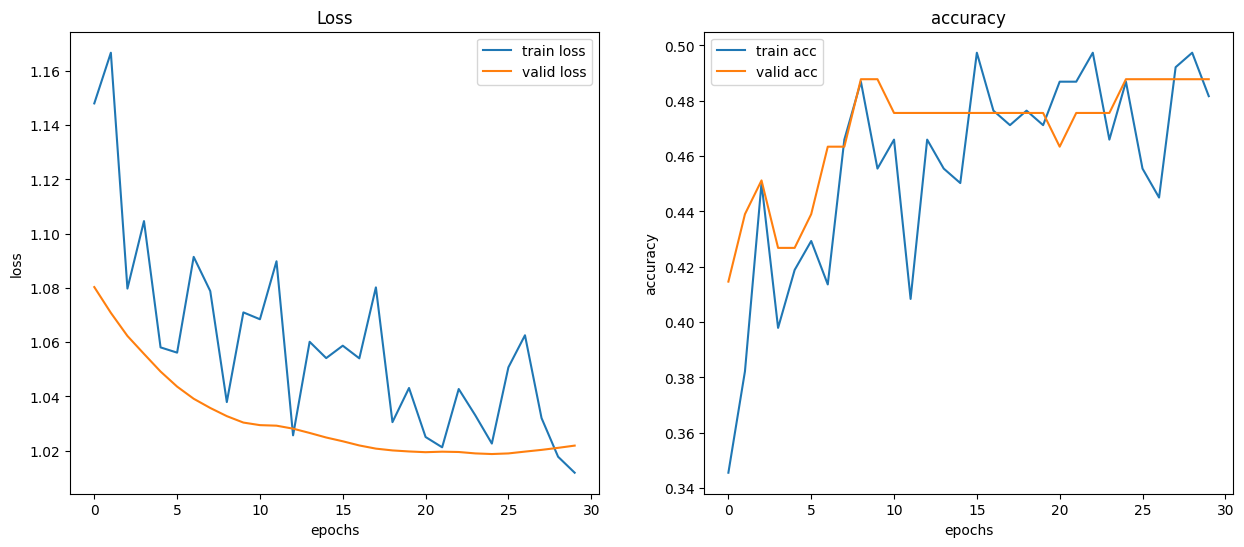

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'],label='train loss')
plt.plot(hist.history['val_loss'],label='valid loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.history['acc'],label='train acc')
plt.plot(hist.history['val_acc'],label='valid acc')
plt.title('accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.show()

In [24]:
# 정답 코드
from tensorflow.keras.models import load_model
import numpy as np

# 35세 남성, 1년 간 150만원 지출, 최근 3개월 내 12회 방문, VIP 추천인, 서울 강남 지점, 의류 구매
real_data = [[-8.13, -8.61, -11.41, -4.58, -1.03, -1.77, 0.04, -0.41, -0.35, 2.58, -0.39, -0.45, -0.44, -0.42, -0.99, -0.75, -0.41, -0.97, -1.03]]


best_model = load_model('best_model_category.keras')
pred_proba = best_model.predict(np.array(real_data))
pred_class_idx = np.argmax(pred_proba, axis=1)[0]

# LabelEncoder의 클래스 순서를 직접 리스트로 정의
# le.classes_ 로 확인했던 순서 ['Basic', 'Premium', 'VIP']
class_names = ['Basic', 'Premium', 'VIP']

#인덱스를 사용하여 최종 등급 이름으로 변환
predicted_grade = class_names[pred_class_idx]


print(f"모델이 예측한 각 등급일 확률 (Basic, Premium, VIP 순): {np.round(pred_proba, 2)}")
print(f"최종 예측 등급: {predicted_grade}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
모델이 예측한 각 등급일 확률 (Basic, Premium, VIP 순): [[0.59 0.22 0.2 ]]
최종 예측 등급: Basic
